<a href="https://colab.research.google.com/github/lilian662/EDO/blob/main/EDPll_13mayo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

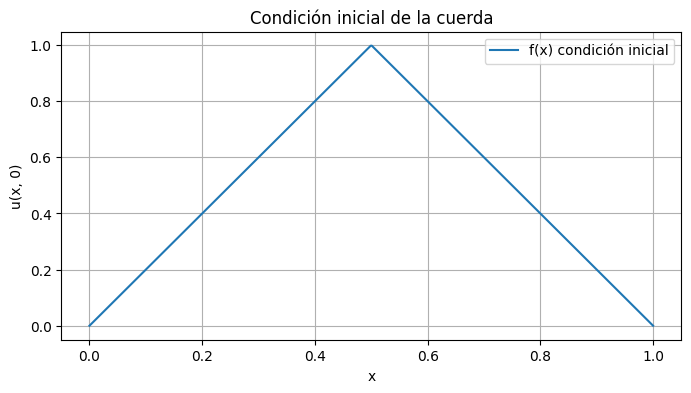

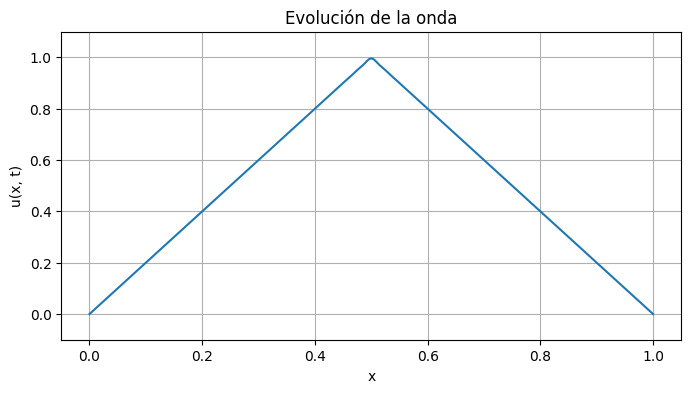

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parámetros
L = 1          # Longitud de la cuerda
c = 1          # Velocidad de propagación
k = 1          # Amplitud del triángulo inicial
N = 100        # Número de términos de la serie
x = np.linspace(0, L, 500)  # Espacio
t_vals = np.linspace(0, 5, 200)  # Tiempo para la animación

# Condición inicial f(x)
def f(x):
    return np.where(x < L/2, (2 * k / L) * x, (2 * k / L) * (L - x))

# Coeficientes bn
def bn(n):
    if n % 2 == 0:
        return 0
    else:
        return (8 * k) / (np.pi**2 * n**2) * np.sin(n * np.pi / 2)

# Solución u(x, t)
def u(x, t):
    result = np.zeros_like(x)
    for n in range(1, N + 1):
        b = bn(n)
        result += b * np.sin(n * np.pi * x / L) * np.cos(n * np.pi * c * t / L)
    return result

# Graficar condición inicial
plt.figure(figsize=(8, 4))
plt.plot(x, f(x), label='f(x) condición inicial')
plt.title("Condición inicial de la cuerda")
plt.xlabel("x")
plt.ylabel("u(x, 0)")
plt.grid(True)
plt.legend()
plt.show()

# Animación de la solución
fig, ax = plt.subplots(figsize=(8, 4))
line, = ax.plot(x, u(x, 0))
ax.set_ylim(-0.1, k + 0.1)
ax.set_title("Evolución de la onda")
ax.set_xlabel("x")
ax.set_ylabel("u(x, t)")
ax.grid(True)

def animate(t):
    line.set_ydata(u(x, t))
    return line,

ani = FuncAnimation(fig, animate, frames=t_vals, interval=50, blit=True)
plt.show()